In [40]:
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [41]:

import pandas as pd

#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are by passing along a list of that information
data.columns = ["city","gender","age","income","ill"]

print("Doente ou Não")
print(data.groupby("ill")["city"].count())
print("\nTotal de registros:", len(data))

Doente ou Não
ill
No     137861
Yes     12139
Name: city, dtype: int64

Total de registros: 150000


In [42]:

#This should look familar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import metrics 
from sklearn import tree


In [43]:
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")
data.columns = ["city","gender","age","income","ill"]
data.head()
data.head()

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


In [17]:
#Instead of yes/no we'll use a 0 or 2
#We use the value '2' to make our analysis later on less ambiguous
data["ill"].replace({"No":0, "Yes":2},inplace=True)

#Convertendo variavels categoricas em 0 e 1
data = pd.get_dummies(data, columns=['city','gender'], dtype='int')
data.head(5)

/tmp/ipykernel_35313/1739608993.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ill"].replace({"No":0, "Yes":2},inplace=True)
/tmp/ipykernel_35313/1739608993.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["ill"].replace({"No":0, "Yes":2},inplace=True)


,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
0,41,40367,0,0,0,1,0,0,0,0,0,0,1
1,54,45084,0,0,0,1,0,0,0,0,0,0,1
2,42,52483,0,0,0,1,0,0,0,0,0,0,1
3,40,40941,0,0,0,1,0,0,0,0,0,0,1
4,46,50289,0,0,0,1,0,0,0,0,0,0,1


In [18]:
features = ["age",\
            "income",\
            "city_Edmonton",\
            "city_Halifax",\
            "city_Montreal",
            "city_Ottawa",\
            "city_Regina",\
            "city_Toronto",
            "city_Vancouver",\
            "city_Waterloo",\
            "gender_Female",\
            "gender_Male"]

X = data[features]


y = data.ill

,age,income,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
0,41,40367,0,0,1,0,0,0,0,0,0,1
1,54,45084,0,0,1,0,0,0,0,0,0,1
2,42,52483,0,0,1,0,0,0,0,0,0,1
3,40,40941,0,0,1,0,0,0,0,0,0,1
4,46,50289,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,48,93669,1,0,0,0,0,0,0,0,0,1
149996,25,96748,1,0,0,0,0,0,0,0,0,1
149997,26,111885,1,0,0,0,0,0,0,0,0,1
149998,25,111878,1,0,0,0,0,0,0,0,0,1


In [21]:
test_percent = 30
train_percent = 100 - test_percent
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

In [22]:
treeClass = DecisionTreeClassifier()

# Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

In [23]:
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy: 
0.8458222222222223


In [28]:
#registro 149120
person_x_yes = [
        32, #age
        82311, #income
        1, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        0, #gender_Female
        1, #gender_Male
]
person_x_yes = pd.DataFrame([person_x_yes],columns=X_test.columns)
#Registro 149121
person_x_no = [
        40, #age
        89780, #income
        1, #city_Edmonton
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        0, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        1, #gender_Female
        0, #gender_Male
]
person_x_no = pd.DataFrame([person_x_no],columns=X_test.columns)



In [26]:
print("Alguém que está doente")
print("Classe prevista pelo modelo: ",treeClass.predict(person_x_yes))
print("Probabilidade associada ao palpite: ",treeClass.predict_proba(person_x_yes))

Someone who is ill
Class predicted by model:  [2]
Probablity associated with the guess:  [[0. 1.]]


In [29]:
print("Alguém que está doente")
print("Classe prevista pelo modelo: ",treeClass.predict(person_x_no))
print("Probabilidade associada ao palpite: ",treeClass.predict_proba(person_x_no))

Alguém que está doente
Classe prevista pelo modelo:  [0]
Probabilidade associada ao palpite:  [[1. 0.]]


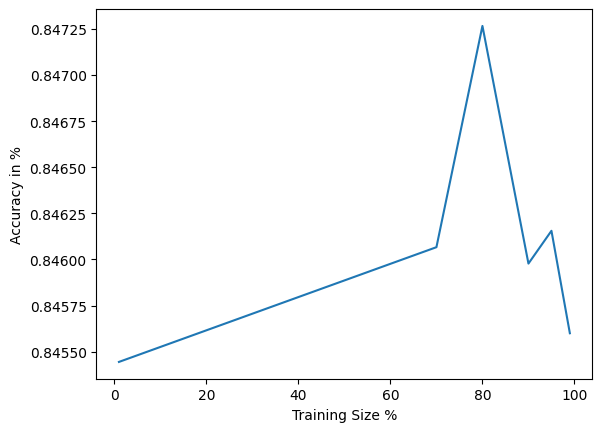

In [30]:
testing_percents = [1,5,10,20,30,99]
accuracy = []
training_percents = []

for test_ratio in sorted(testing_percents):
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100 - test_ratio)

    
plt.plot(training_percents,accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

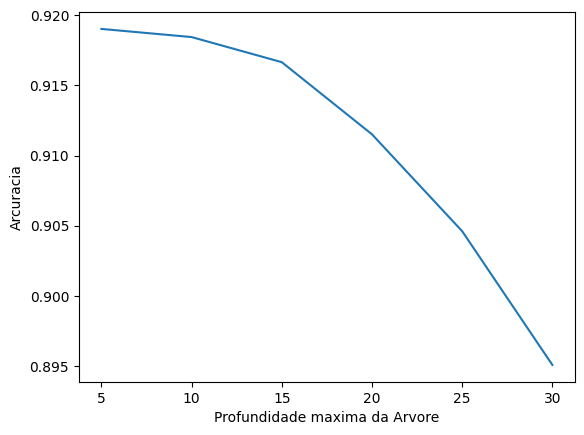

In [35]:
test_percent = 70
max_options = [5,10,15,20,25,30]

accuracy = []
tree_max = []

for max_d in sorted(max_options):
    X_train, X_test, y_train, y_test = train_test_split(X, \
                                                        y, \
                                                        test_size=test_percent/100.0,
                                                        random_state=10,
                                                       )
    
    
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train,y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)
    
plt.plot(max_options,accuracy)
plt.ylabel("Arcurácia")
plt.xlabel("Profundidade máxima da Arvore")
plt.show()

In [39]:
import json

# Criando uma lista de 30 textos que representam comentários fictícios em uma postagem do Instagram de um tribunal eleitoral
comentarios = [
    "Incrível o trabalho que o tribunal está fazendo para garantir eleições justas! 👏",
    "Parabéns pela transparência e dedicação! A democracia agradece.",
    "Espero que todos os votos sejam contados corretamente. Estou acompanhando!",
    "Muito bom ver o empenho em manter a integridade do processo eleitoral.",
    "Vamos votar com consciência e respeitar o resultado das urnas!",
    "Admiro o esforço para combater as fake news durante as eleições.",
    "É fundamental ter um tribunal eleitoral forte e independente. Apoio total!",
    "Agradeço pelo compromisso com a justiça e a verdade. O país precisa disso.",
    "Esperando que as eleições deste ano sejam as mais transparentes possível.",
    "Confio no trabalho do tribunal para preservar a democracia brasileira.",
    "Cada voto conta! Vamos fazer dessa eleição um exemplo de cidadania.",
    "Importante lembrar: o voto é secreto e seguro. Confiança total no sistema.",
    "Obrigado por nos manter informados sobre o processo eleitoral. Informação é chave!",
    "Acompanhando de perto o excelente trabalho de vocês. Parabéns a toda equipe!",
    "Todo apoio às iniciativas de educação para um voto consciente.",
    "Sucesso nas eleições! Que tudo ocorra com paz e justiça.",
    "Impressionado com a organização e seriedade do tribunal. Confiança no processo.",
    "Vamos juntos fortalecer nossa democracia. Contamos com vocês!",
    "Espero que a justiça prevaleça em qualquer disputa eleitoral. Apoiando sempre.",
    "Transparência é a chave para a confiança do povo. Continuem assim!",
    "A democracia se fortalece com instituições sólidas e imparciais como esta.",
    "Um voto consciente é um passo gigante para o futuro do país.",
    "Admirável o trabalho contra a desinformação. É essencial para a democracia.",
    "Cada detalhe no processo eleitoral é importante. Parabéns pela atenção!",
    "Esperançoso com as próximas eleições. Que seja um processo limpo e justo.",
    "A importância de um tribunal eleitoral atuante não pode ser subestimada.",
    "Um lembrete de que cada cidadão tem papel crucial na democracia.",
    "Iniciativas de acessibilidade nas urnas são louváveis. Parabéns!",
    "Fé na justiça e no trabalho de todos envolvidos nas eleições.",
    "Ansioso pelos resultados, mas confiante no processo. Vamos que vamos!"
]

# Convertendo a lista de comentários em JSON
comentarios_json = json.dumps(comentarios, ensure_ascii=False, indent=2)

# Exibindo o JSON criado
#print(comentarios_json)
with open('data2.json', 'w') as f:
    json.dumps(comentarios, ensure_ascii=False, indent=2)

